<a href="https://colab.research.google.com/github/zrosen3/Colombian-peso-counterfeit-detection/blob/main/Code/res_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries

In [ ]:
#Set up google colab working environment
%cd ~/../content
%rm -rf Colombian-peso-counterfeit-detection
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code       

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 21578, done.
remote: Counting objects: 100% (613/613), done.
remote: Compressing objects: 100% (346/346), done.
remote: Total 21578 (delta 377), reused 452 (delta 263), pack-reused 20965
Receiving objects: 100% (21578/21578), 447.75 MiB | 40.30 MiB/s, done.
Resolving deltas: 100% (471/471), done.
Updating files: 100% (62400/62400), done.
/content/Colombian-peso-counterfeit-detection/Code


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
import common_functions as cf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


#Load in data

In [ ]:
train_ds, test_ds, validation_ds, class_names = cf.LoadData(path = "../Data/Augmented/", batch_size=12)


Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


## Run Resnet model

In [ ]:
#Reshape data
output_shape = (224, 224)
def reshape_batch(images, labels):
    resized_images = tf.image.resize(images, output_shape)  # Resize the images
    return (resized_images, labels)
train_ds = train_ds.map(reshape_batch)
test_ds = test_ds.map(reshape_batch)
validation_ds = validation_ds.map(reshape_batch)
print(train_ds)
print(test_ds)
print(validation_ds)

<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
#Run ResNet model
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
model.add(tf.keras.layers.Rescaling(1./255))
model.add(resnet_base)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=13, activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data = validation_ds, epochs=5)

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/5
390/390 [==============================] - 223s 431ms/step - loss: 0.1958 - accuracy: 0.9420 - val_loss: 18.0372 - val_accuracy: 0.0769
Epoch 2/5
390/390 [==============================] - 146s 371ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 8.1729 - val_accuracy: 0.0837
Epoch 3/5
390/390 [==============================] - 148s 378ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 6.8236e-04 - val_accuracy: 0.9998
Epoch 4/5
390/390 [==============================] - 145s 371ms/step - loss: 2.4744e-04 - accuracy: 1.0000 - val_loss: 1.3461e-05 - val_accuracy: 1.0000
Epoch 5/5
390/390 [==============================] - 147s 376ms/step - loss: 6.2567e-05 - accuracy: 1.0000 - val_loss: 4.7070e-06 - val_accuracy: 1.0000


## Inspect model performance

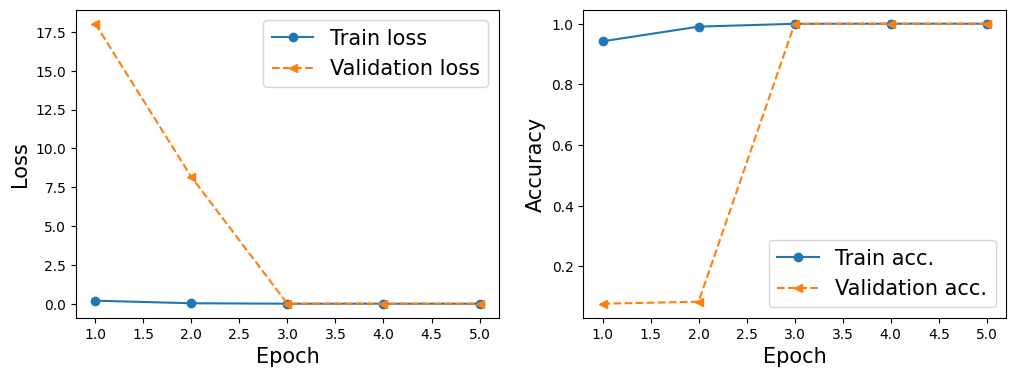

130/130 - 16s - loss: 4.3450e-06 - accuracy: 1.0000 - 16s/epoch - 126ms/step
Test loss: 4.345032721175812e-06 | Test accuracy: 1.0


(1.0, 1.0, 1.0)

In [ ]:
cf.EvaluateModel(model, test_ds, history)

Macro averaged precision score: 1.0
Macro averaged recall score: 1.0
Macro averaged F1 score: 1.0


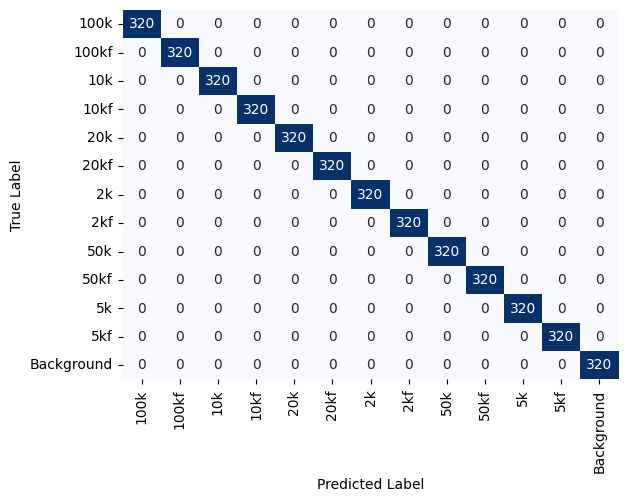

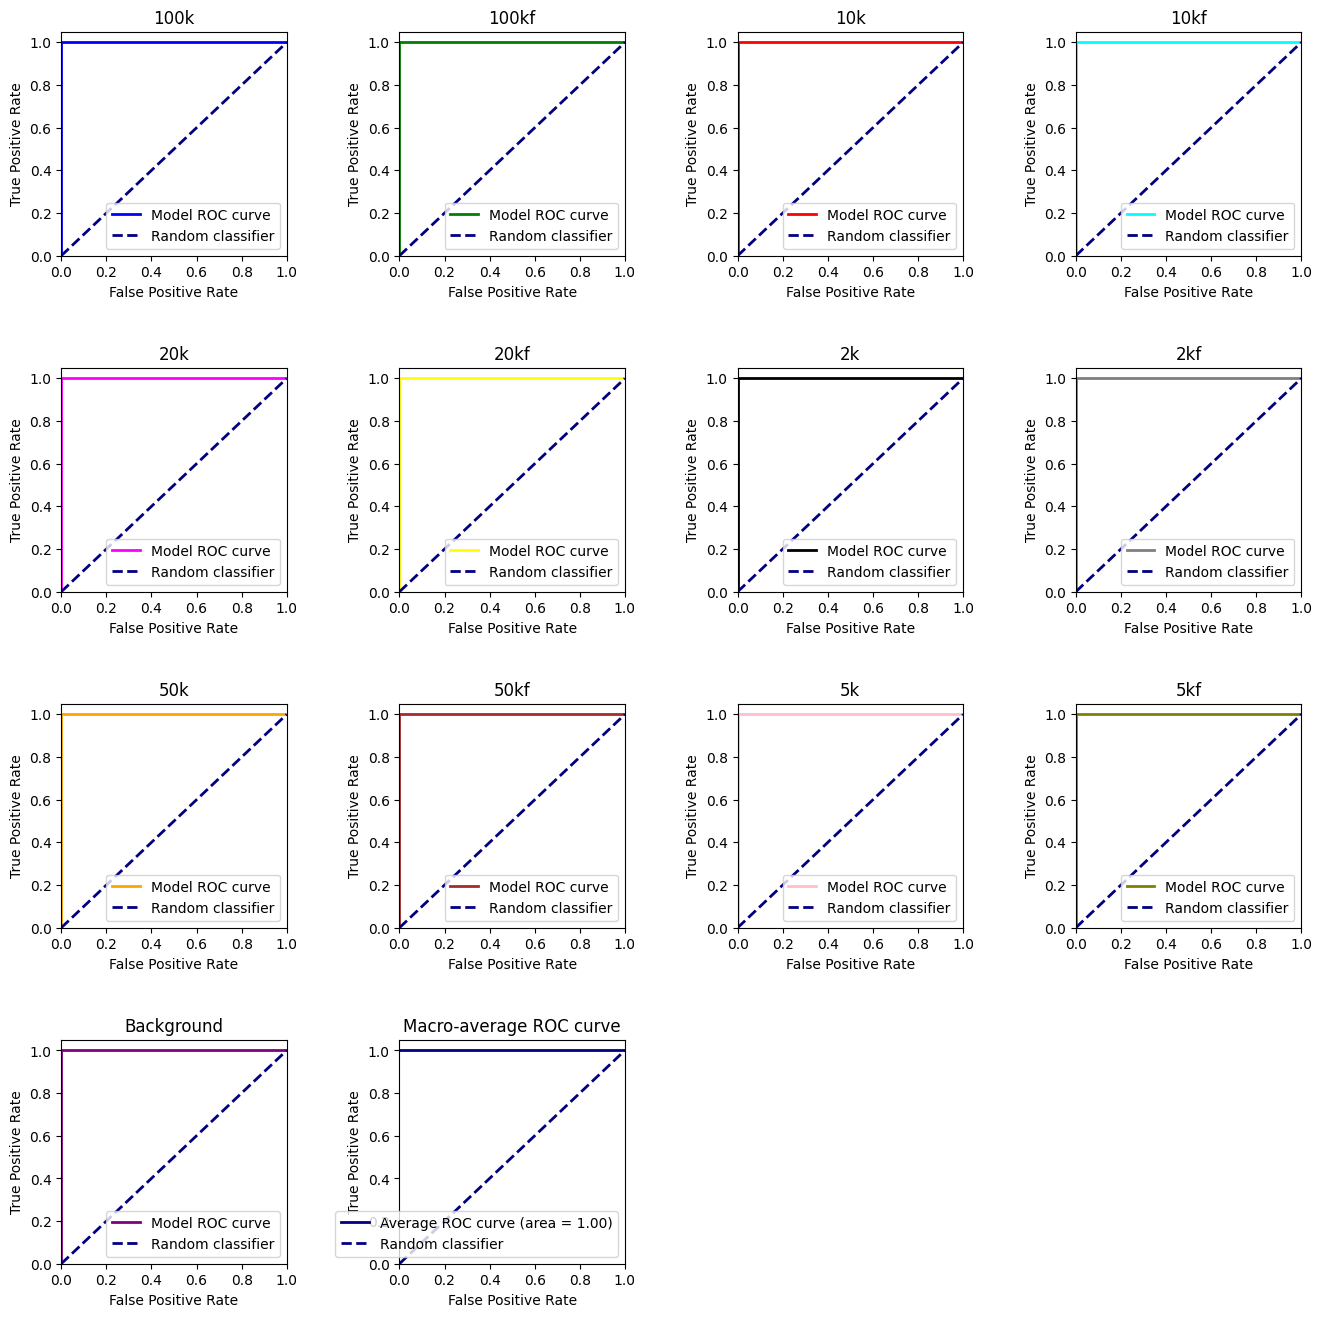

In [ ]:
cf.precision_recall_metrics(model, test_ds, class_names)